Fundamentos de machine learning
===

Preparación
----

In [1]:
import pandas as pd

scopus = pd.read_csv("https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/scopus-papers.csv")
scopus['Author Keywords'].head()

0    Geo-location data; Human mobility; Resilience;...
1    Language analysis; LIWC; Moral foundations the...
2    Gravity model; Media ecosystem; News spreading...
3    Centrality measures; Community Structure; Infl...
4    Cholesterol; Diabetes; Digital purchase record...
Name: Author Keywords, dtype: object

Descripción del problema
---

La columna `'Author Keywords'` contiene las palabras claves de un conjunto de artículos extraído de Scopus. Estas palabras clave son consideradas descriptores del contenido del artículo, por lo que su análisis permite establecer el contenido conceptual de un cuerpo de literatura. De ahí que muchas técnicas de estadística y aprendizaje de máquinas sean empleadas para su análisis.

En este ejercicio, usted empleará los conocimientos adquiridos en el curso para construir un gráfico análitico comúnmente usado para el análisis comparativo de palabras que representan conceptos. Véase por ejemplo https://tlab.it/en/allegati/help_en_online/msvd.htm

1. Determine las 100 palabras clave más frecuentes. Utilice las funciones de Pandas para manipular el archivo, realizar el conteo a partir de los datos de la columna 'Author Keywords'. Como evidencia de este punto imprima las primeras y las últimas 5 palabras de este grupo de 100 palabras, y su frecuencia.

2. Construya la matriz documento-termino. Las filas son los documentos y las columnas son las 100 palabras clave más frecuentes. La matriz debería estar poblada de unos y ceros. Debe eliminar las filas que corresponden a los documentos que no usan ninguna de las 100 palabras clave más frecuentes. Como evidencia verifique que la suma de las columnas de la matriz documento-término es igual a la frecuencia computada para cada palabra en el punto anterior.

3. Construya la matriz de co-ocurrencias. En esta matriz, las filas y las columnas corresponden a las palabras claves. La diagonal es el total de veces que aparece la respectiva palabra. Los demas elementos de la matriz corresponden a las veces que aparece la palabra A con la palabra B en un mismo documento. esta matriz puede calcularse como transpuesta(A) * A, donde A es la matriz docuemnto-término. Como evidencia, grafique un mapa de calor, como por ejemplo, los obtenidos al usar seaborn. 

4. Para visualizar las relaciones de las palabras clave (cercanía), se puede reducir la dimensionalidad de la matriz de co-occurrencias a dos componentes usando SVD (o MSD), y graficar las palabras clave a partir de las coordenadas obtenidas. Un ejemplo se presenta a continuación (extraido del manual de usuario de T-LAB). El tamaño del texto es proporcional a la frecuencia de las palabras clave. Construya un gráfico similar a partir de la matriz de co-occurrencias que fue obtenida en el punto anterior.

![tlab](https://tlab.it/en/allegati/help_en_online/tlab_image/svd05.gif)

In [2]:
#== Librerías a utilizar ==
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
import warnings

# Con este parámetro obtenemos salidas de código más limpias.
warnings.filterwarnings('ignore')

In [3]:
data = scopus['Author Keywords']
data = data.dropna()
data

0       Geo-location data; Human mobility; Resilience;...
1       Language analysis; LIWC; Moral foundations the...
2       Gravity model; Media ecosystem; News spreading...
3       Centrality measures; Community Structure; Infl...
4       Cholesterol; Diabetes; Digital purchase record...
                              ...                        
1895    Data usability; Database; Geo-data warehouse; Sdi
1896    GIS; Population census; Spatial patterns; Spat...
1897    ARPEGE’; Conceptual modelling; ESDA; Geovizual...
1898    Research questions; Spatial data; Usability; U...
1899    Data integration; Data wrapping; ISO; Metadata...
Name: Author Keywords, Length: 1793, dtype: object

In [4]:
def limpieza(keywords):
  keywords = keywords.lower()
  # keywords = keywords.replace(' ','')
  # keywords = keywords.strip()
  separador = keywords = keywords.split(';')
  return list(set(separador))

data = []

for keywords in list(scopus['Author Keywords'].dropna().astype(str)):
  for keyword in limpieza(keywords):
    data.append(keyword)

data

['geo-location data',
 ' resilience',
 ' human mobility',
 ' social media',
 ' psychological profile',
 ' liwc',
 'language analysis',
 ' moral foundations theory',
 ' political extremism',
 ' media ecosystem',
 ' news spreading',
 'gravity model',
 ' propaganda model',
 ' influential nodes',
 'centrality measures',
 ' sir model',
 ' community structure',
 ' metabolic syndrome',
 ' nutrition',
 ' diabetes',
 'cholesterol',
 ' loyalty card',
 ' london',
 ' hypertension',
 ' grocery',
 ' digital purchase records',
 ' job advertisement',
 ' labour markets',
 'computational social science',
 ' gender inequality',
 ' text mining',
 ' soft skills',
 ' crowdsourcing',
 'mate choice',
 ' social network',
 ' online dating',
 ' preference',
 ' sharing economy',
 'homophily',
 ' social networks',
 ' statistical validation',
 ' online user behavior',
 ' mutual information',
 'behavioral economics',
 ' transfer of entropy',
 ' networks',
 ' financial markets',
 ' life history',
 ' mobile phones',
 

In [5]:
data = [i.lstrip() for i in data]
data

['geo-location data',
 'resilience',
 'human mobility',
 'social media',
 'psychological profile',
 'liwc',
 'language analysis',
 'moral foundations theory',
 'political extremism',
 'media ecosystem',
 'news spreading',
 'gravity model',
 'propaganda model',
 'influential nodes',
 'centrality measures',
 'sir model',
 'community structure',
 'metabolic syndrome',
 'nutrition',
 'diabetes',
 'cholesterol',
 'loyalty card',
 'london',
 'hypertension',
 'grocery',
 'digital purchase records',
 'job advertisement',
 'labour markets',
 'computational social science',
 'gender inequality',
 'text mining',
 'soft skills',
 'crowdsourcing',
 'mate choice',
 'social network',
 'online dating',
 'preference',
 'sharing economy',
 'homophily',
 'social networks',
 'statistical validation',
 'online user behavior',
 'mutual information',
 'behavioral economics',
 'transfer of entropy',
 'networks',
 'financial markets',
 'life history',
 'mobile phones',
 'social networks',
 'egocentric networks

In [6]:
Frecuencia = nltk.FreqDist(data)
print(Frecuencia)
key_list = list()
key_val = list()
df = pd.DataFrame(columns=['Keywords', 'Frecuencia'])
for key, val in Frecuencia.items():
  key_list.append(key)
  key_val.append(val)

df['Keywords'] = key_list
df['Keywords'] = df['Keywords'].str.replace(' ','_')
df['Frecuencia'] = key_val
df

<FreqDist with 6368 samples and 9292 outcomes>


,Keywords,Frecuencia
0,geo-location_data,1
1,resilience,4
2,human_mobility,18
3,social_media,29
4,psychological_profile,1
...,...,...
6363,research_questions,1
6364,service_chain,1
6365,system_architecture,1
6366,data_wrapping,1


In [7]:
df = df.sort_values(by= ['Frecuencia'], ascending=False, ignore_index=True)
df

,Keywords,Frecuencia
0,big_data,167
1,data_mining,134
2,machine_learning,57
3,clustering,41
4,big_data_analytics,37
...,...,...
6363,sequential_implementation,1
6364,resampling,1
6365,particle_filter,1
6366,memory_consumption,1


In [8]:
top100 = df[0:100]
top100

,Keywords,Frecuencia
0,big_data,167
1,data_mining,134
2,machine_learning,57
3,clustering,41
4,big_data_analytics,37
...,...,...
95,apache_spark,6
96,wikipedia,6
97,forecasting,6
98,privacy_preservation,6


In [9]:
top_cinco = top100.head()
top_cinco

,Keywords,Frecuencia
0,big_data,167
1,data_mining,134
2,machine_learning,57
3,clustering,41
4,big_data_analytics,37


In [10]:
ultimas_cinco = top100.tail()
ultimas_cinco

,Keywords,Frecuencia
95,apache_spark,6
96,wikipedia,6
97,forecasting,6
98,privacy_preservation,6
99,k-means_clustering,6


In [11]:
#Matriz Documento-Término
Documento = list(scopus['Author Keywords'].astype(str))

names_cols = list(top100['Keywords'])
vacia = np.full((len(Documento),len(top100)),0)

mdt = pd.DataFrame(vacia, columns=names_cols)
for index in range(len(Documento)):
  text = Documento[index]
  text1 = str(text).split(';')
  for internal_index in range (len(text1)):
    text2 = text1[internal_index]
    t_lower = str.lower(text2)
    t_lower_ = t_lower.strip()
    for k in names_cols:
      if t_lower_ == k:
        mdt[k][index] = 1

mdt

,big_data,data_mining,machine_learning,clustering,big_data_analytics,classification,business_intelligence,metadata,social_media,mapreduce,...,security,magnetometer,urban_form,spark,scalability,apache_spark,wikipedia,forecasting,privacy_preservation,k-means_clustering
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1899,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
mdt['Suma'] = mdt.sum(axis=1)
mdt = mdt.drop(mdt[mdt['Suma']==0].index)
mdt = mdt.reset_index(drop=True)
mdt = mdt.drop(['Suma'], 1)
mdt

,big_data,data_mining,machine_learning,clustering,big_data_analytics,classification,business_intelligence,metadata,social_media,mapreduce,...,security,magnetometer,urban_form,spark,scalability,apache_spark,wikipedia,forecasting,privacy_preservation,k-means_clustering
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Matríz de co-ocurrencias
mdt_t = np.transpose(mdt)
co_ocurrencias = np.dot(mdt_t, mdt)
co_ocurrencias = pd.DataFrame(co_ocurrencias, columns = names_cols, index = names_cols)
co_ocurrencias

,big_data,data_mining,machine_learning,clustering,big_data_analytics,classification,business_intelligence,metadata,social_media,mapreduce,...,security,magnetometer,urban_form,spark,scalability,apache_spark,wikipedia,forecasting,privacy_preservation,k-means_clustering
big_data,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
data_mining,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
machine_learning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
clustering,0,0,0,41,0,4,0,0,0,2,...,0,0,0,0,1,0,0,0,0,0
big_data_analytics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
apache_spark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wikipedia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
forecasting,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,0
privacy_preservation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


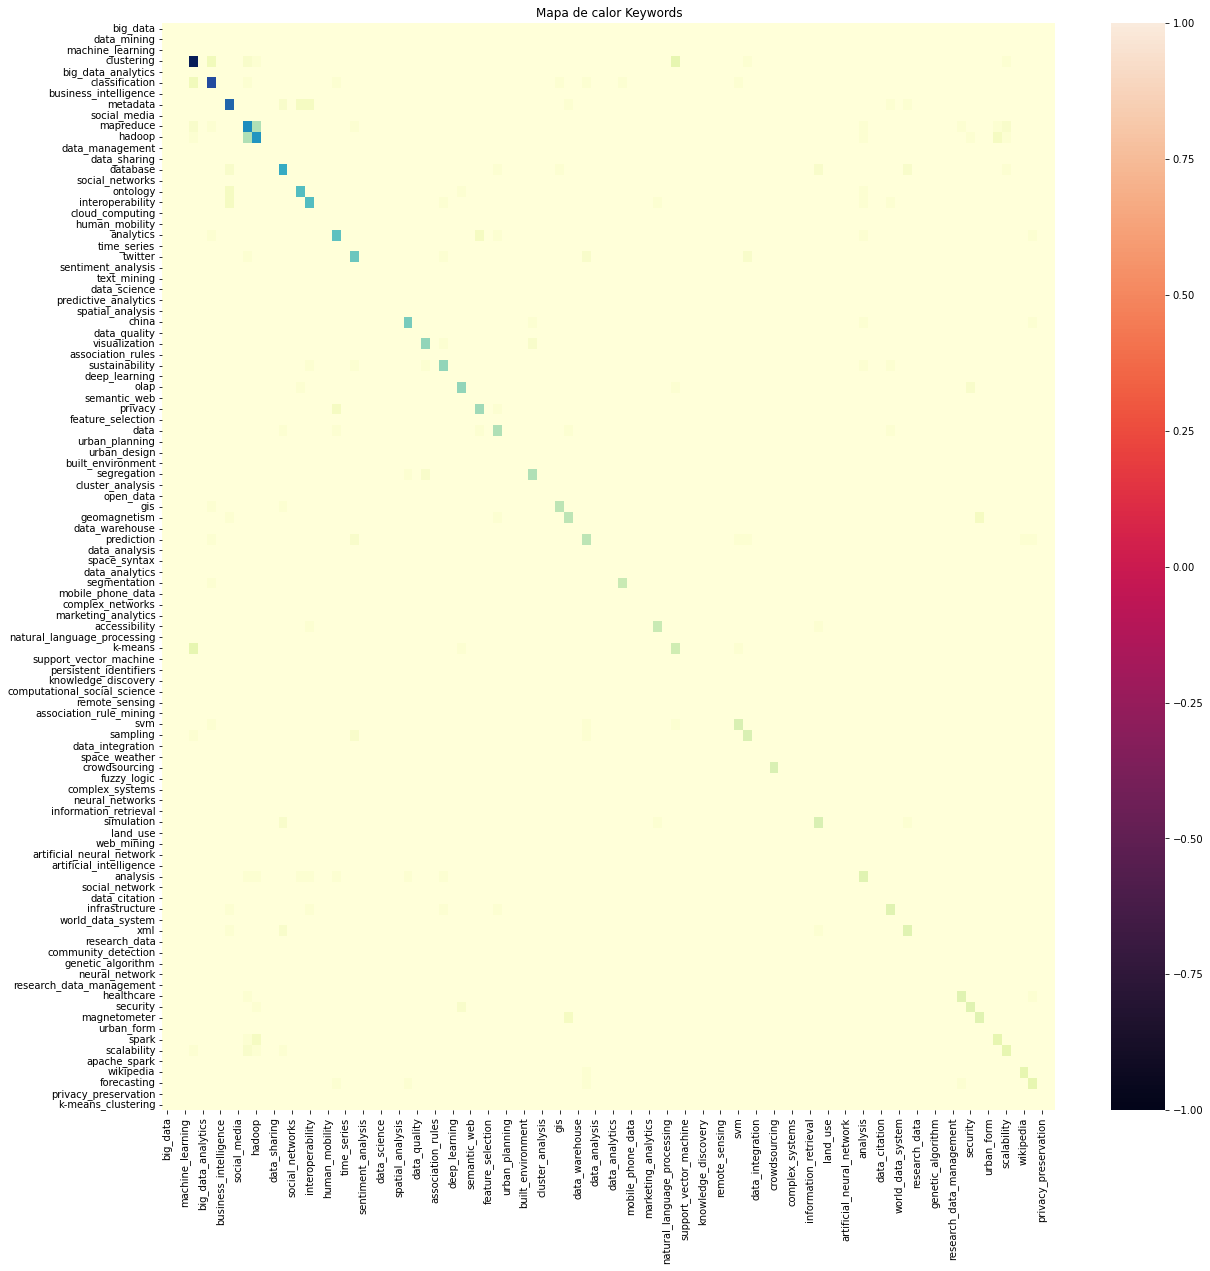

In [14]:
plt.rcParams["figure.figsize"] = (20, 20)
correlacion = scopus.corr()
sns.heatmap(correlacion)
sns.heatmap(co_ocurrencias, cbar=None, cmap='YlGnBu')
plt.title('Mapa de calor Keywords')
plt.show()

In [15]:
co_ocurrencias_descompuesta = MDS().fit_transform(co_ocurrencias)
co_ocurrencias_descompuesta

array([[  0.06300052,   0.15583052],
       [  0.06300052,   0.15583052],
       [  0.06300052,   0.15583052],
       [ 27.65990665, -30.92678573],
       [  0.06300052,   0.15583052],
       [ 12.33026126,  30.98874002],
       [  0.06300052,   0.15583052],
       [-21.12375819,  21.82599709],
       [  0.06300052,   0.15583052],
       [-16.00681352, -23.71430473],
       [-27.17588312,  -5.86645419],
       [  0.06300052,   0.15583052],
       [  0.06300052,   0.15583052],
       [-18.61042157, -11.33734812],
       [  0.06300052,   0.15583052],
       [ 15.80986016,  10.86630434],
       [ 17.90257826,  -6.31733306],
       [  0.06300052,   0.15583052],
       [  0.06300052,   0.15583052],
       [  2.57141691, -17.7022255 ],
       [  0.06300052,   0.15583052],
       [ 16.86615087,   1.22665536],
       [  0.06300052,   0.15583052],
       [  0.06300052,   0.15583052],
       [  0.06300052,   0.15583052],
       [  0.06300052,   0.15583052],
       [  0.06300052,   0.15583052],
 

In [ ]:
# co_ocurrencias_descompuesta = pd.DataFrame(co_ocurrencias_descompuesta, columns=['X','Y'])
# co_ocurrencias_descompuesta

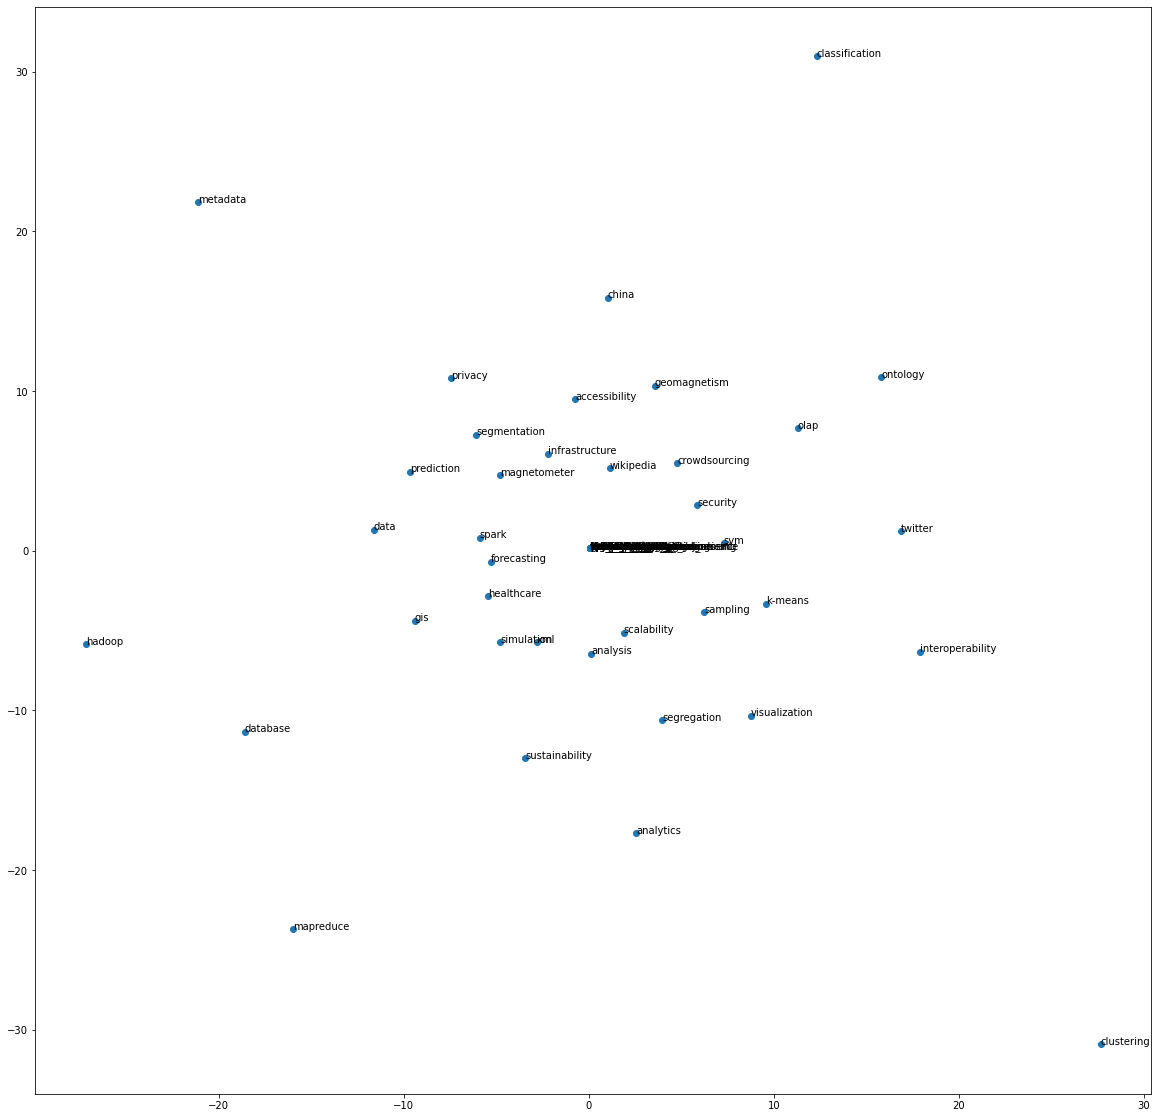

In [16]:
plt.scatter(
    co_ocurrencias_descompuesta[:, 0],
    co_ocurrencias_descompuesta[:,1],
    cmap='viridis'
)
for fila in range(co_ocurrencias_descompuesta.shape[0]):
  x = co_ocurrencias_descompuesta[fila, 0]
  y = co_ocurrencias_descompuesta[fila, 1]
  plt.text(x, y, co_ocurrencias.index[fila])

plt.show()